In [1]:
import ujson as json
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn.cluster as clstr
import scipy.sparse as sp
plt.rcParams['figure.figsize'] = [10, 10]
import seaborn as sb
import pandas as pd
import itertools

In [2]:
from dbscan import *
from angles import *
from plot_pose import *
from process import *

In [3]:
type_1_files = ['2_train.json', '2_test.json', '1_test.json', '1_train.json']
type_2_files = ['Apsaras3.json', '2_test_2.json']
positions = []
grottoes = []
files = []
ARTIC_NAMES = {'foot 1': 0,
               'foot 2': 1,
               'knee 1': 2,
               'knee 2': 3,
               'belly': 4,
               'elbow 1': 5,
               'elbow 2': 6,
               'hand 1': 7,
               'hand 2': 8,
               'eye 1': 9,
               'eye 2': 10,
               'shoulder 1': 11,
               'shoulder 2': 12}
for f in type_1_files: 
    file = open(f)
    data = json.load(file)
    for i in range(0,len(data)):
        apsara = data[i]
        files.append(apsara['apsaras']['file'])
        grottoes.append(apsara['apsaras']['grottoe'])
        access = apsara['apsaras']['positions']
        position = []
        for articulation in ARTIC_NAMES.keys():
            position.append(access[articulation])
        positions.append(position)

for f in type_2_files: 
    file = open(f)
    data = json.load(file) 
    for apsara in data['apsaras']:
        grottoes.append(apsara['grottoe'])
        files.append(apsara['file'])
        access = apsara['positions']
        position = []
        for articulation in ARTIC_NAMES.keys():
            position.append(access[articulation])
        positions.append(position)
        
positions = np.array(positions)

In [4]:
positions.shape

(557, 13, 2)

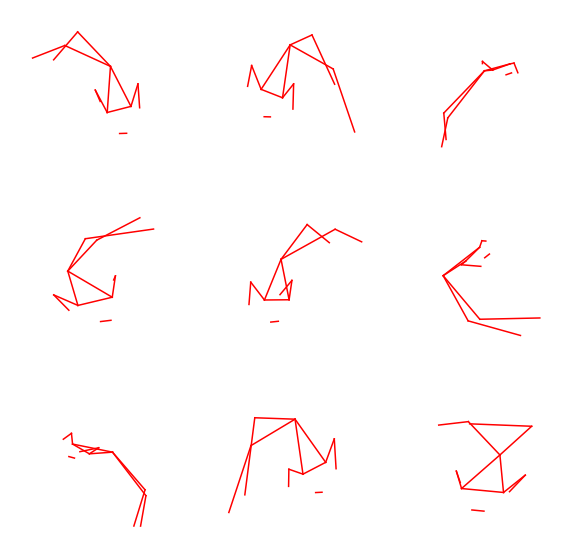

In [5]:
km = prepare_kmeans(positions, 9)
centers = km.cluster_centers_
plot_all(centers.reshape(centers.shape[0], -1, 2))

### Unpickle dataframes

In [31]:
def retrieve_np(filename):
    frame = pd.read_pickle(filename).drop(["file", "dynasty"], axis=1, level=0)
    return frame.to_numpy().reshape(frame.shape[0], -1, 2)

In [52]:
sui = retrieve_np('./sui.pkl')
tang = retrieve_np('./tang.pkl')
wudai = retrieve_np('./wudai.pkl')
xiwei = retrieve_np('./xiwei.pkl')
beiliang = retrieve_np('./beiliang.pkl')
beizhou = retrieve_np('./beizhou.pkl')
beiwei = retrieve_np('./beiwei.pkl')
period_names = ("sui", "tang", "wudai", "xiwei", "beiliang", "beizhou", "beiwei")

## Temporal analysis for the knee

In [54]:
agls_knees = {}
for name, time in zip(period_names, (sui, tang, wudai, xiwei, beiliang, beizhou, beiwei)):
    agls_knees[name] = get_angles(remove_nans(preprocess(time)))[:, :2]

In [48]:
colors = {-1: 'black',
          0: 'r',
          1: 'g',
          2: 'b',
          3: 'm',
          4: 'y',
          5: 'b', 
          6: 'brown',
          7: 'crimson',
          8: 'pink',
          9: 'gold',
          10: 'navy',
          11: 'violet'}

### Beiliang

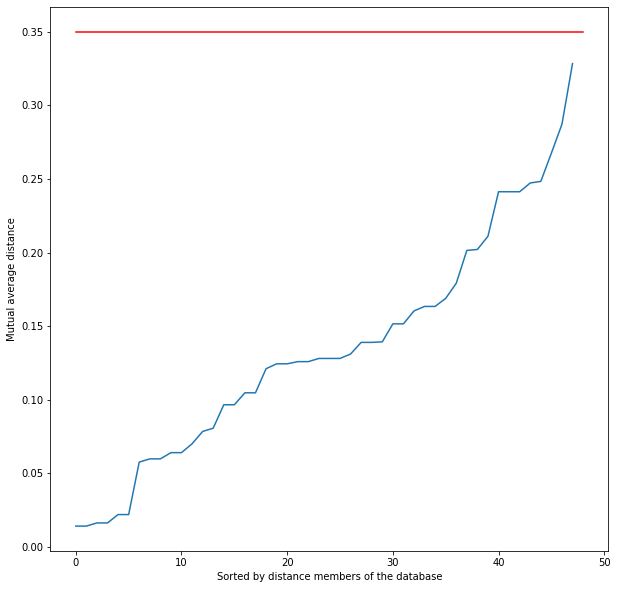

In [85]:
dbscan_choose_eps(agls_knees["beiliang"], .35)

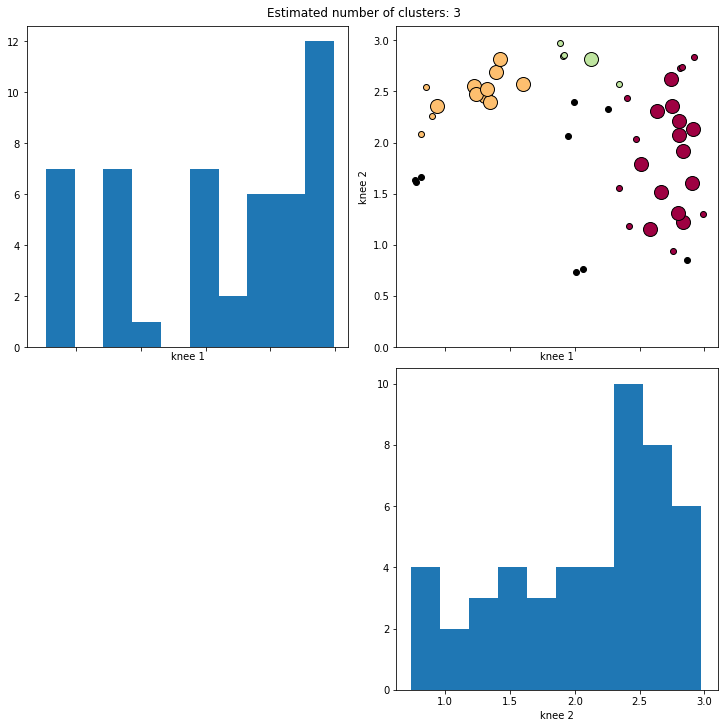

In [86]:
labels_beil, _ = do_dbscan(agls_knees["beiliang"], .35, names=["knee 1", "knee 2"])

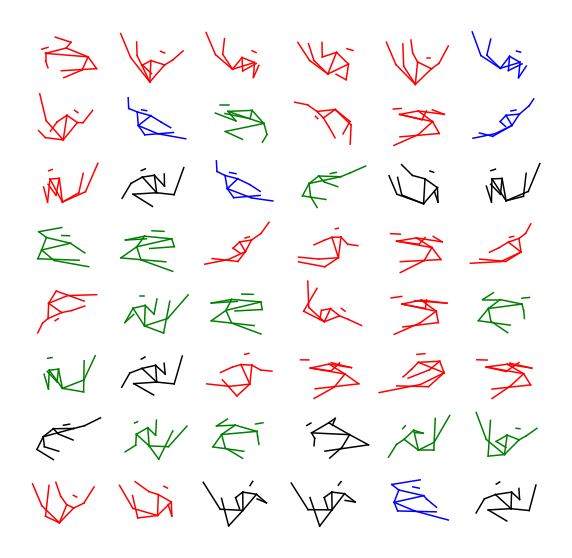

In [88]:
plot_all(remove_nans(preprocess(beiliang)),
         colors=lambda lbl: colors[lbl],
         labels=labels_beil)

### Beiwei

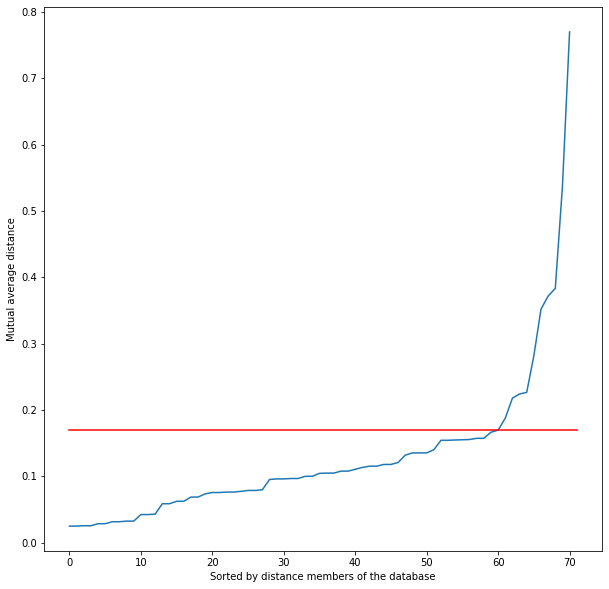

In [70]:
dbscan_choose_eps(agls_knees["beiwei"], .17)

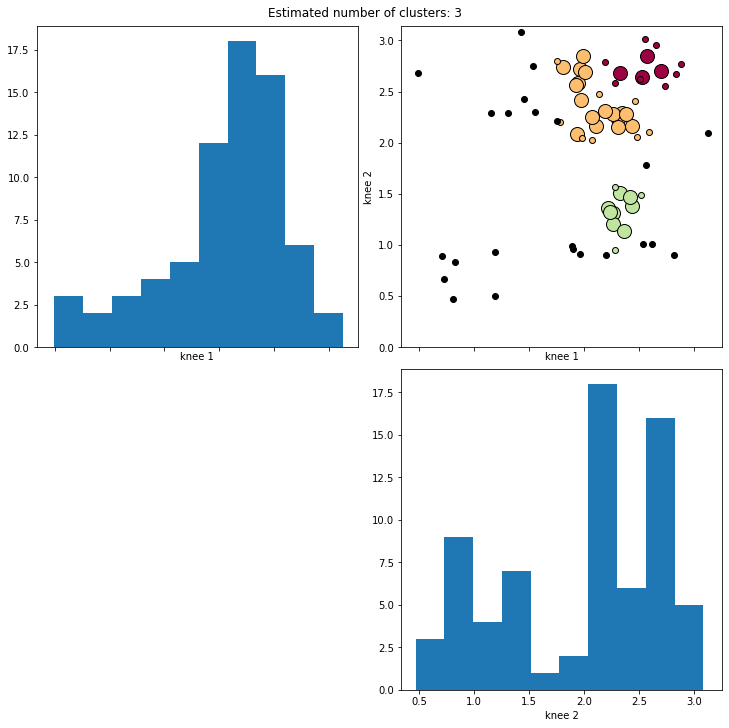

In [67]:
labels_beiw, _ = do_dbscan(agls_knees["beiwei"], .17, names=["knee 1", "knee 2"])

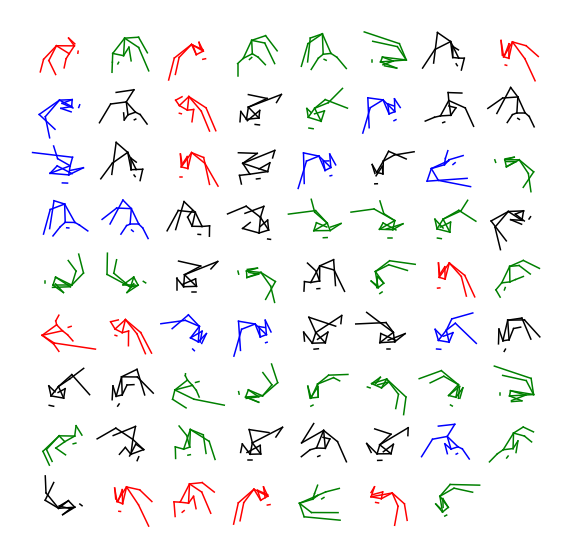

In [68]:
plot_all(remove_nans(preprocess(beiwei)),
         colors=lambda lbl: colors[lbl],
         labels=labels_beiw)

### Xiwei

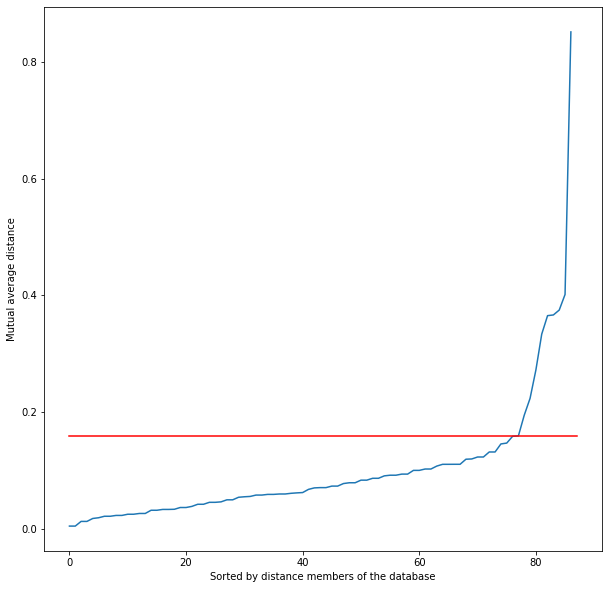

In [76]:
dbscan_choose_eps(agls_knees["xiwei"], .16)

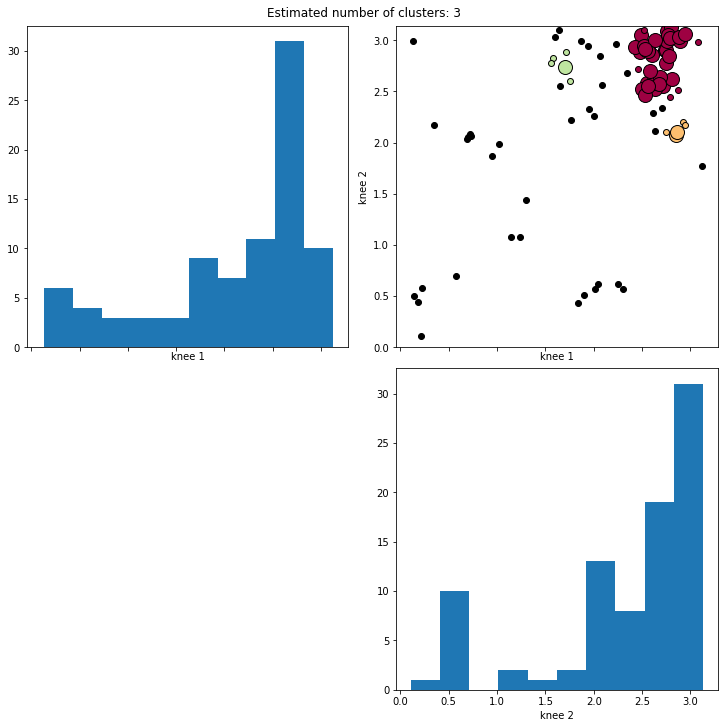

In [79]:
labels_xi, _ = do_dbscan(agls_knees["xiwei"], .16, names=["knee 1", "knee 2"])

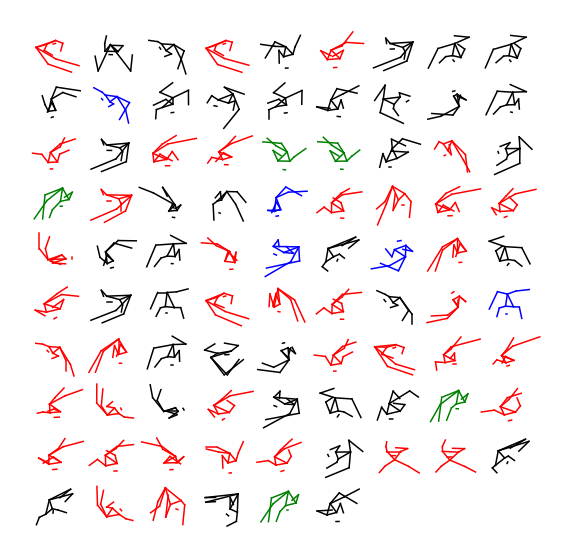

In [80]:
plot_all(remove_nans(preprocess(xiwei)),
         colors=lambda lbl: colors[lbl],
         labels=labels_xi)

### Beizhou

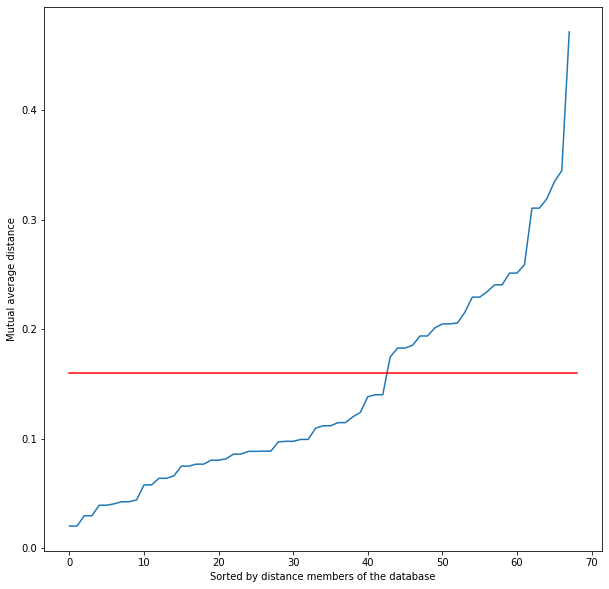

In [89]:
dbscan_choose_eps(agls_knees["beizhou"], .16)

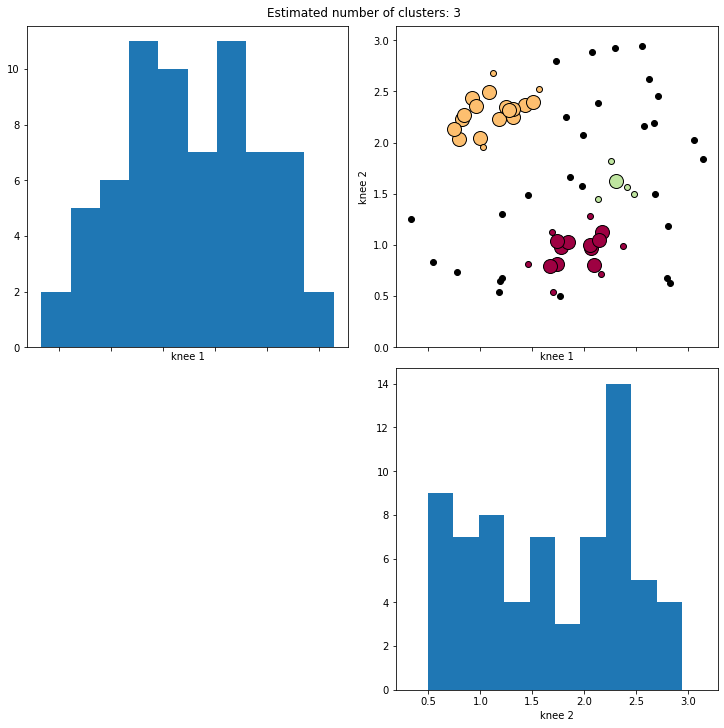

In [93]:
labels_beiz, _ = do_dbscan(agls_knees["beizhou"], .28, names=["knee 1", "knee 2"])

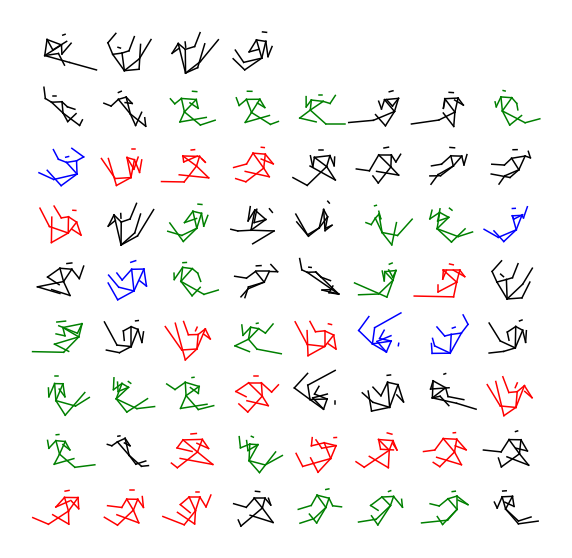

In [94]:
plot_all(remove_nans(preprocess(beizhou)),
         colors=lambda lbl: colors[lbl],
         labels=labels_beiz)

### Sui

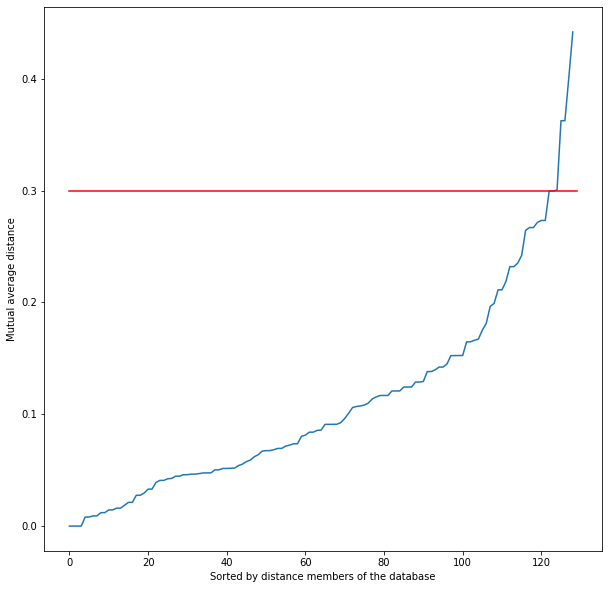

In [107]:
dbscan_choose_eps(agls_knees["sui"], .3)

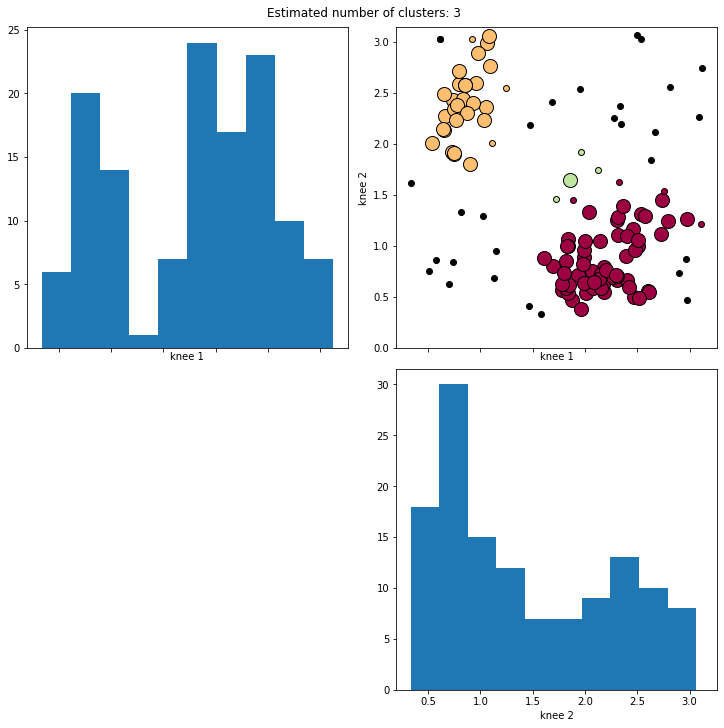

In [109]:
labels_sui, _ = do_dbscan(agls_knees["sui"], .3, names=["knee 1", "knee 2"])

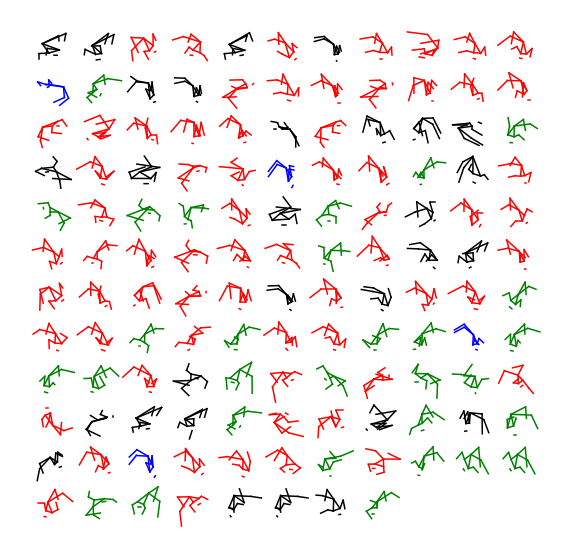

In [110]:
plot_all(remove_nans(preprocess(sui)),
         colors=lambda lbl: colors[lbl],
         labels=labels_sui)

### Tang

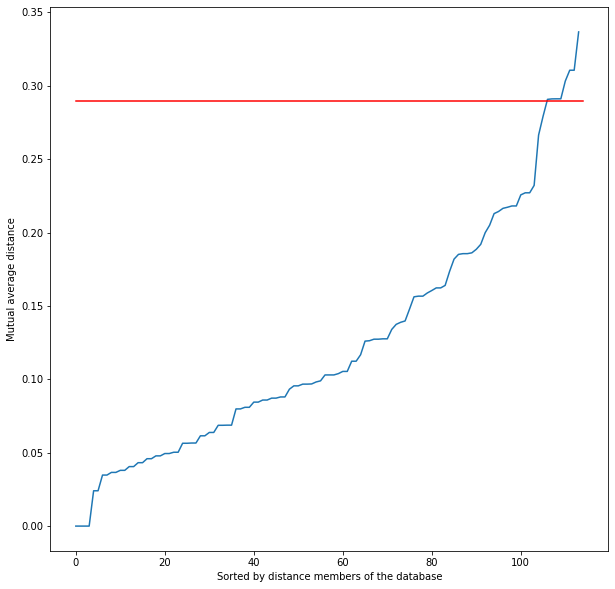

In [121]:
dbscan_choose_eps(agls_knees["tang"], .29)

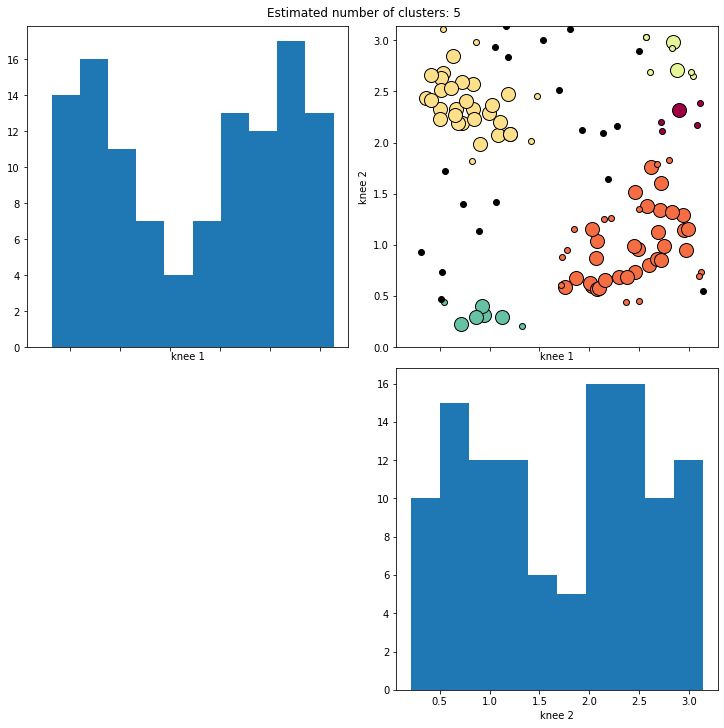

In [122]:
labels_tang, _ = do_dbscan(agls_knees["tang"], .29, names=["knee 1", "knee 2"])

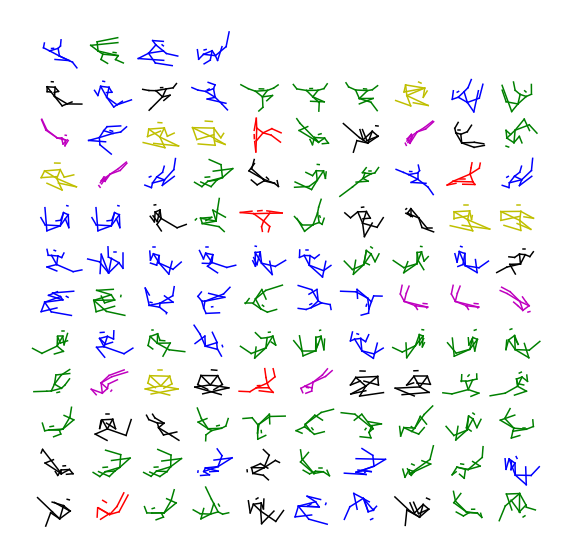

In [123]:
plot_all(remove_nans(preprocess(tang)),
         colors=lambda lbl: colors[lbl],
         labels=labels_tang)

### Wudai

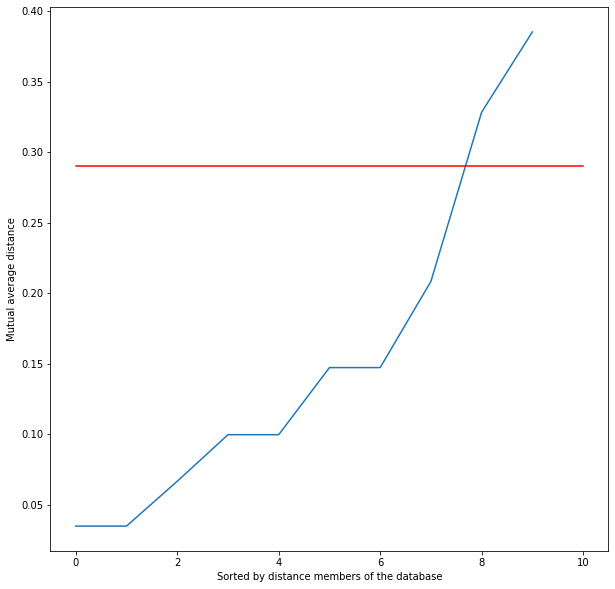

In [124]:
dbscan_choose_eps(agls_knees["wudai"], .29)

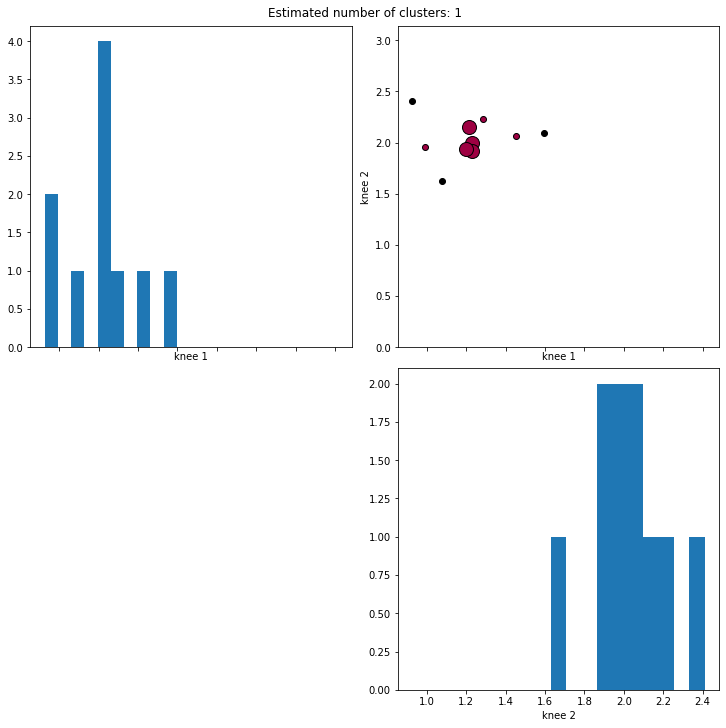

In [128]:
labels_wud, _ = do_dbscan(agls_knees["wudai"], .25, names=["knee 1", "knee 2"])

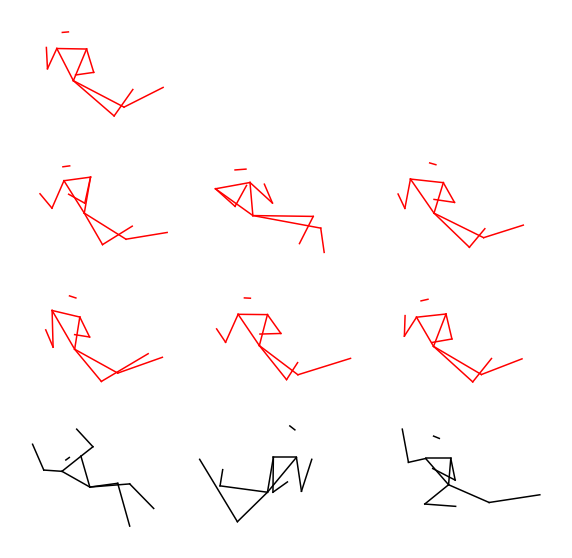

In [129]:
plot_all(remove_nans(preprocess(wudai)),
         colors=lambda lbl: colors[lbl],
         labels=labels_wud)